<a href="https://colab.research.google.com/github/fkivuti/Regression_analysis_week6-project/blob/main/Copy_of_AfterWork_Data_Science_Dojo_Regression_Analysis_With_Python_Guiding_Notebook_ipynb_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color='#2F4F4F'>1. Defining the Question</font>

### a) Specifying the Data Analysis Question

Perform multiple linear regression to predict the price of a house. Make sure to check for assumptions.

### b) Defining the Metric for Success

The project will be a success when we are able to create a multiple linear regression model that fits at least 80% of the training data.

### c) Understanding the Context 

Knightly Frankly is an estate agency, residential and commercial property consultancy
founded in London by John Knight, Howard Frank and William Rutley in 1896.
Together with its New York-based affiliate Newmark, Knightly Frankly is one of the
world's largest global property consultancies.
As a data scientist working for the agency, you have been put to task to help develop a
solution that would allow the agency to price its properties.

### d) Recording the Experimental Design

1. Load datasets and libraries
2. Clean data
3. Perform univariate and bivariate analysis
4. Check that the assumptions of multiple linear regression aren't violated
5. Perform multiple linear regression
6. Summarize findings
7. Provide recommendations
8. Challenge the solution

### e) Data Relevance

The dataset provided is appropriate and relevant to the research question.

## <font color='#2F4F4F'>2. Data Cleaning & Preparation</font>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max.columns', None)

In [3]:
house = pd.read_csv('house_data.csv')
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
# check dataset shape
house.shape

(21613, 21)

In [6]:
# chekc data types
house.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

We will drop the 'id' and 'date' variables and then drop any duplicated values so that it will be easier to work with the dataset.

In [7]:
house = house.drop(columns = ['id', 'date'])

In [8]:
# dropping duplicates, if any
house.drop_duplicates(inplace = True)
house.shape

(21608, 19)

In [9]:
# check for missing data
house.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There are no missing values.

## <font color='#2F4F4F'>3. Data Analysis</font>

For our analysis, we will check the assumptions of multiple linear regression which include:
1. There must be a linear relationship between the independent variables and the target variable.
2. Few or no outliers.
3. Little to no multicollinearity.
4. Homoscedasticity - variance of error terms must be similar across the independent variables.
5. All residuals must be normally distributed. 

### 3.1 Checking linearity

In [10]:
# create list to store column names to test against 'price'
house_columns = house.columns.to_list()
house_columns.remove('price')
len(house_columns)

18

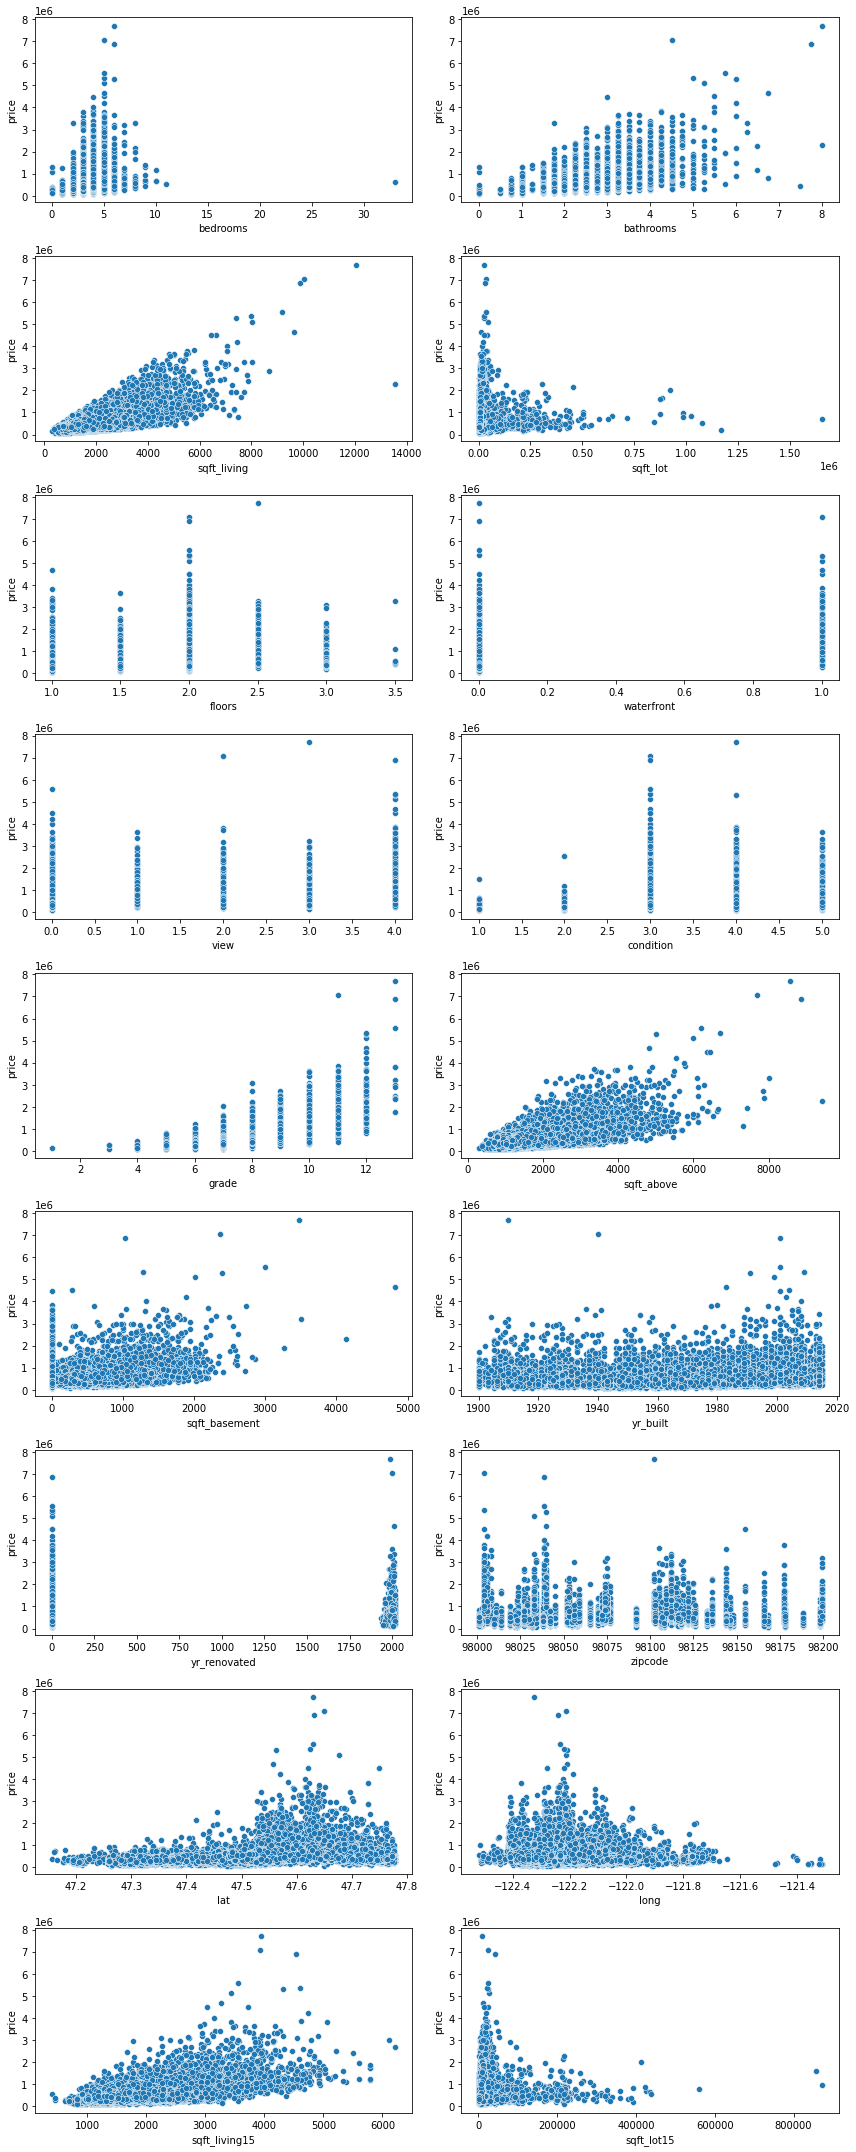

In [11]:
# creating scatterplots to observe the relationship between price and the variables
import warnings
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(nrows = 9, ncols = 2, figsize = (12, 30))

for ax, col in zip(axes.flatten(), house_columns):
    sns.scatterplot(house[col], house['price'], ax = ax)
    plt.xlabel("{}".format(col))
    plt.ylabel("price")
    
plt.tight_layout()

What have you noticed? What will you do next?
The scatter plots indicate that some features have a level of positive linear relationship with price e.g. sqft_living15, sqft_above and sqft_living. 
Some features like condition, View, year_renovated, Zipcode, floors, waterfront and bedroon dont exhibit any form of relationship to price.

Such feature are potential candidates of being ommited when modeling.

The next step is to populate a correlation coeficient matrix of these features to and also see how they relate to price in order to understand better the extent of their relatioship. 

We will set a threshold for the correlation coefficient and do away with features that do not meet the set criteria later

### 3.2 Checking for outliers

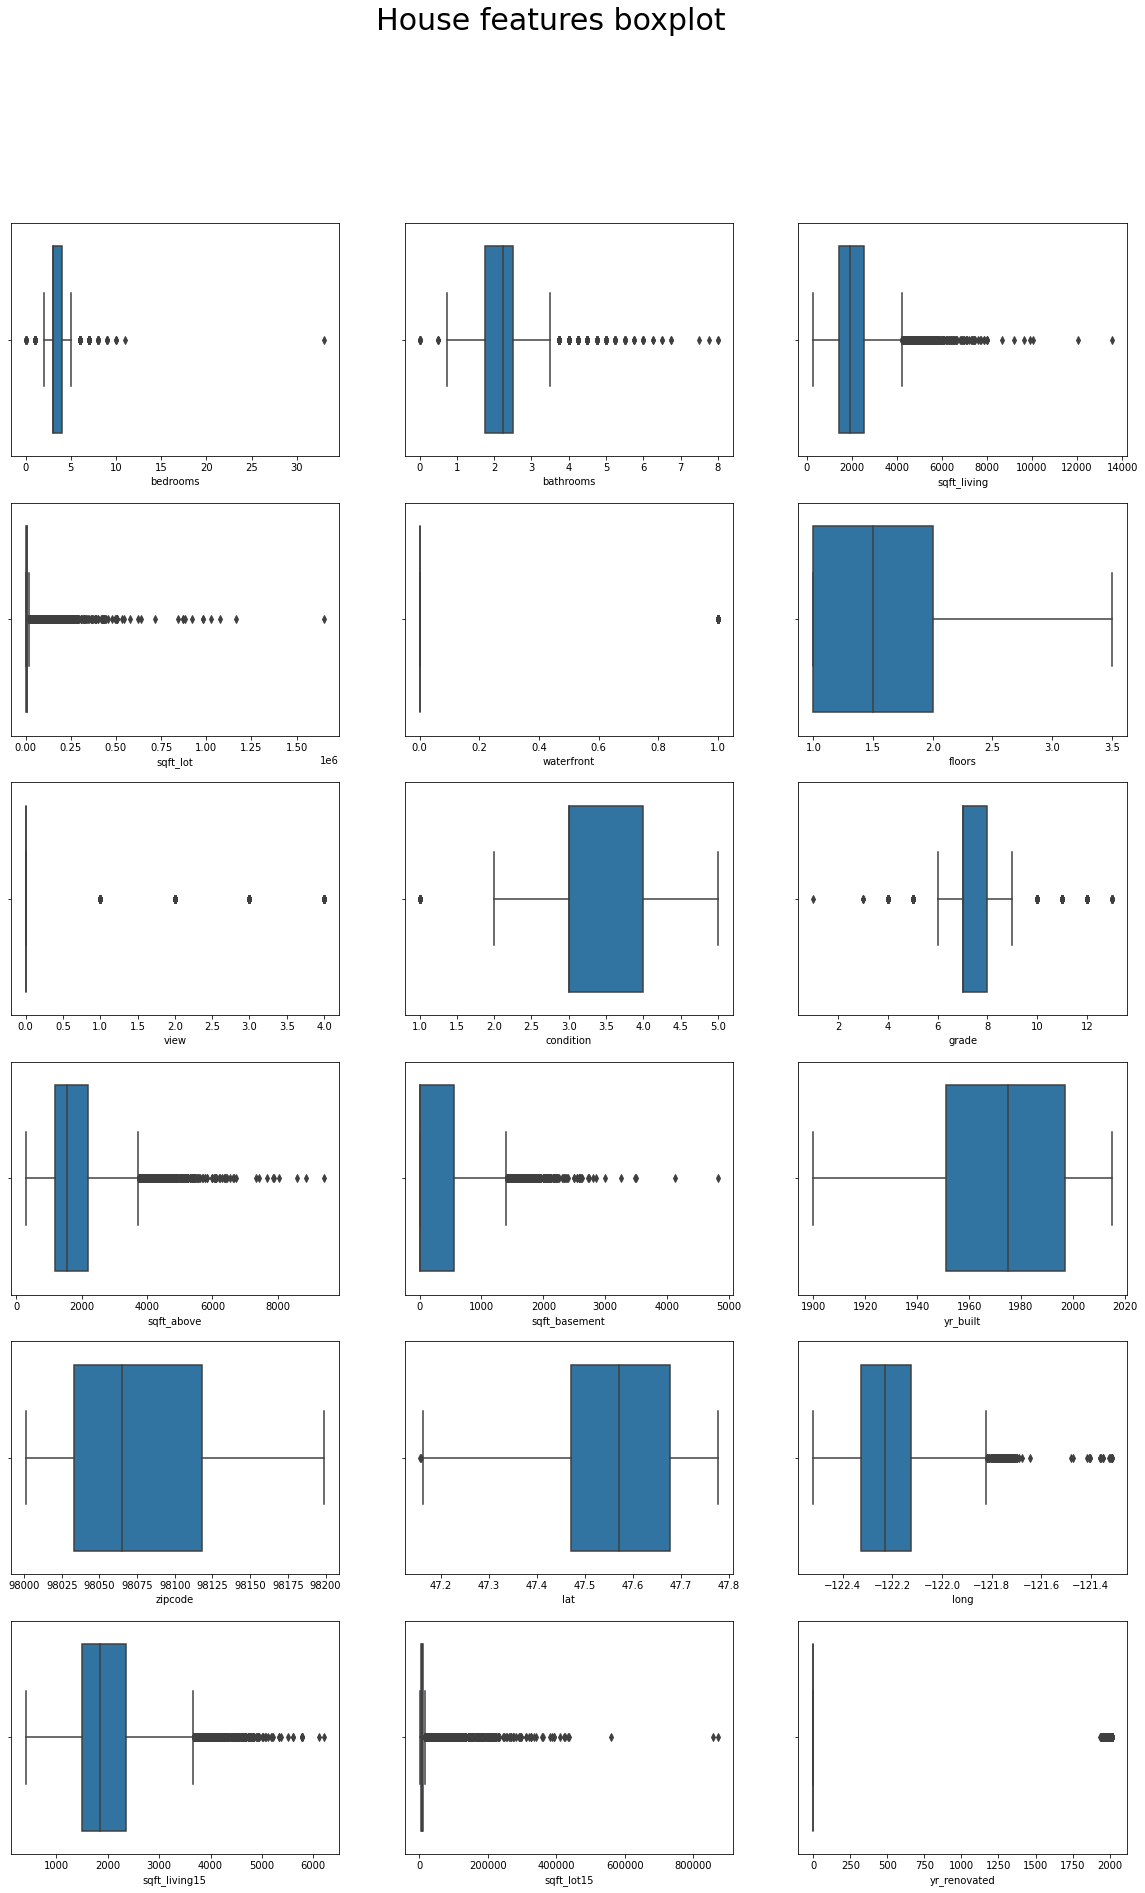

In [12]:
# create a boxplot to visualize the outliers
# YOUR CODE HERE

fig, axes = plt.subplots(6, 3, figsize=(20, 30))
  
fig.suptitle('House features boxplot', size = 30)
  
sns.boxplot(ax=axes[0, 0], data=house, x='bedrooms')
sns.boxplot(ax=axes[0, 1], data=house, x='bathrooms')
sns.boxplot(ax=axes[0, 2], data=house, x='sqft_living')
sns.boxplot(ax=axes[1, 0], data=house, x='sqft_lot')
sns.boxplot(ax=axes[1, 1], data=house, x='waterfront')
sns.boxplot(ax=axes[1, 2], data=house, x='floors')
sns.boxplot(ax=axes[2, 0], data=house, x='view')
sns.boxplot(ax=axes[2, 1], data=house, x='condition')
sns.boxplot(ax=axes[2, 2], data=house, x='grade')
sns.boxplot(ax=axes[3, 0], data=house, x='sqft_above')
sns.boxplot(ax=axes[3, 1], data=house, x='sqft_basement')
sns.boxplot(ax=axes[3, 2], data=house, x='yr_built')
sns.boxplot(ax=axes[4, 0], data=house, x='zipcode')
sns.boxplot(ax=axes[4, 1], data=house, x='lat')
sns.boxplot(ax=axes[4, 2], data=house, x='long')
sns.boxplot(ax=axes[5, 0], data=house, x='sqft_living15')
sns.boxplot(ax=axes[5, 1], data=house, x='sqft_lot15')
sns.boxplot(ax=axes[5, 2], data=house, x='yr_renovated')

What observations can you make? What actions are you going to take next?

Most columns have outliers of which is undesirable for a machine learning model.
we will remove the outliers so that our model can learn from data that is within normal / desirable ranges.

In [13]:
# to filter out the Outliers in the house dataframe 
# We first define our quantiles using the quantile() function
# ---
# 
Q1 = house.quantile(0.25)
Q3 = house.quantile(0.75)
IQR = Q3 - Q1
IQR

# Then filtering out our outliers by getting values which are outside our IQR Range.
# ---
#
house_iqr = house[((house < (Q1 - 1.5 * IQR)) | (house > (Q3 + 1.5 * IQR))).any(axis=1)]

# One way of dealing with outliers is removing them 
# Checking the size of the dataset with outliers before cleaning to see the voulume of data we are forfeiting.
# ---
#
house_iqr.shape

(6677, 19)

we let go the 6k records

In [14]:
# Lets drop the outliers and retain a clean dataframe
house_df = house[ ~((house < (Q1 - 1.5 * IQR)) | (house > (Q3 + 1.5 * IQR))).any(axis=1)]

# Checking the size of our final dataset.
house_df.shape

(14931, 19)

We will work with the 14k records

### 3.3 Checking multicollinearity

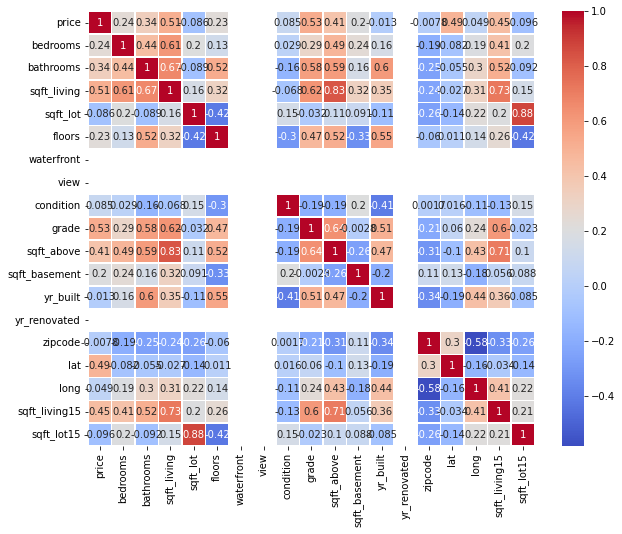

In [15]:
# create a heatmap of the correlations
# we first define a correlation matrix of the cleaned up house_df

corrmat = house_df.corr()
corrmat

# we plot our heatmap as follows
plt.figure(figsize=(10,8))

# We then plot our heatmap visualistion
# 
import seaborn as sns
sns.heatmap(corrmat, annot=True, linewidth=0.5, cmap='coolwarm');

In [16]:
# on seeing the above heatmap, we will check the variance of the various columns as some columns did not populate anything in the heatmat
house_df.var().sort_values(ascending=False)

price            3.250853e+10
sqft_lot         1.126706e+07
sqft_lot15       8.923830e+06
sqft_living      3.778162e+05
sqft_above       3.617818e+05
sqft_living15    2.573072e+05
sqft_basement    1.247973e+05
zipcode          2.860057e+03
yr_built         8.555292e+02
grade            6.476595e-01
bedrooms         5.973837e-01
condition        4.189192e-01
bathrooms        4.174197e-01
floors           3.000709e-01
lat              2.019431e-02
long             1.529984e-02
yr_renovated     0.000000e+00
view             0.000000e+00
waterfront       0.000000e+00
dtype: float64

In [17]:
# create new column
house_df['years_until_remod'] = house_df['yr_renovated'] - house_df['yr_built']

# lets drop yr renovated and yr built columns
house_df = house_df.drop(columns=['yr_renovated','yr_built'])

# recheck the variance again
house_df.var().sort_values(ascending=False)

price                3.250853e+10
sqft_lot             1.126706e+07
sqft_lot15           8.923830e+06
sqft_living          3.778162e+05
sqft_above           3.617818e+05
sqft_living15        2.573072e+05
sqft_basement        1.247973e+05
zipcode              2.860057e+03
years_until_remod    8.555292e+02
grade                6.476595e-01
bedrooms             5.973837e-01
condition            4.189192e-01
bathrooms            4.174197e-01
floors               3.000709e-01
lat                  2.019431e-02
long                 1.529984e-02
view                 0.000000e+00
waterfront           0.000000e+00
dtype: float64

we will do away with the view, waterfront and yr renovated as they have the losest variance and the model may not learn much from these columns but before then we will derive a new column called year_until_remod from yr built and yr renovated columns.

The new column derived has a good variance and correlates much better with price than yr renovated did

In [18]:
house_df=house_df.drop(columns=['waterfront','view'])
house_df.shape

(14931, 16)

In [19]:
# check VIF scores
# create an inverse matrix with the inital correlation matrix
corrmat2 = house_df.corr()

inver = pd.DataFrame(np.linalg.inv(corrmat2.values), index = corrmat2.index, columns=corrmat2.columns)
inver

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,years_until_remod
price,2.893175,0.114484,-0.168020,-1.123059e+00,0.142810,-0.112176,-0.290107,-0.996871,2.234296e-01,1.593756e-01,0.224769,-1.228116,0.004969,-0.404929,0.267505,-0.912063
bedrooms,0.114484,1.726761,-0.337927,-8.532864e-01,-0.062154,-0.022944,-0.045563,0.175390,-2.404520e-01,-1.263471e-01,0.076873,0.022193,0.045148,0.071026,-0.127381,-0.187621
bathrooms,-0.168020,-0.337927,2.992886,-1.952105e+00,0.049773,-0.673163,-0.172977,-0.147447,1.123721e+00,1.304440e-01,0.085582,0.067593,-0.028588,-0.076579,0.144584,1.101583
sqft_living,-1.119229,-0.841057,-1.958653,2.703062e+13,-0.029014,2.108962,0.640362,-0.376122,-2.645081e+13,-1.553525e+13,-0.290554,0.365832,0.027242,-0.244243,0.242917,-0.253407
sqft_lot,0.142810,-0.062154,0.049773,-3.327939e-02,4.720005,0.394886,0.013855,0.005587,-5.145351e-01,-1.074695e-01,0.146651,-0.001412,-0.127497,0.126533,-3.842060,-0.234186
floors,-0.112176,-0.022944,-0.673163,2.102247e+00,0.394886,2.796463,0.075438,-0.218822,-2.843327e+00,-5.351420e-01,-0.099121,-0.083447,0.214295,0.258268,0.578659,0.634796
condition,-0.290107,-0.045563,-0.172977,6.392888e-01,0.013855,0.075438,1.315014,0.054161,-5.174113e-01,-4.251935e-01,0.135706,0.163633,-0.038610,0.191553,-0.150375,-0.523187
grade,-0.996871,0.175390,-0.147447,-3.728507e-01,0.005587,-0.218822,0.054161,2.688490,-2.024824e-01,7.620481e-02,0.058529,0.126979,0.330469,-0.470912,-0.130796,0.873252
sqft_above,0.225817,-0.240122,1.134132,-2.645081e+13,-0.518521,-2.849407,-0.518522,-0.199402,2.588345e+13,1.520202e+13,0.020802,0.181708,-0.397291,-1.250463,-0.258105,0.131436
sqft_basement,0.159379,-0.128510,0.137090,-1.553525e+13,-0.109572,-0.538076,-0.425803,0.078262,1.520202e+13,8.928545e+12,-0.006395,-0.112024,0.157296,-0.335863,-0.051951,0.042623


What have you noticed? What actions are you going to take next regarding this?

we notice that sqft_lot has  a VIF value nearing 5. we will drop it to see the effect on other variables VIF scores

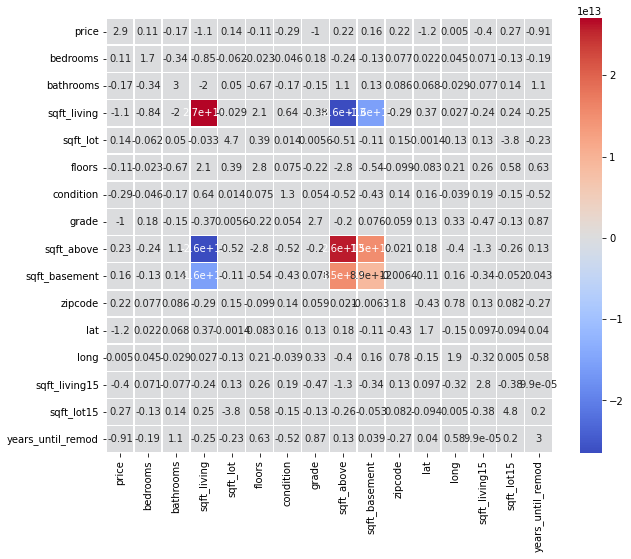

In [20]:
# we plot our heatmap of our inverse matrix as follows for better visibility
plt.figure(figsize=(10,8))

# We then plot our heatmap visualistion
sns.heatmap(inver, annot=True, linewidth=0.5, cmap='coolwarm');

In [21]:
# drop the sqft_lot column create a correlation matrix and use it to derive new VIF values 
house_df2 = house_df.drop(columns=['sqft_lot'])
corrmat3 = house_df2.corr()

inver2 =pd.DataFrame(np.linalg.inv(corrmat3.values), index = corrmat3.index, columns=corrmat3.columns)
inver2

,price,bedrooms,bathrooms,sqft_living,floors,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,years_until_remod
price,2.888854,0.116365,-0.169526,-1.120915e+00,-0.124124,-0.290526,-0.997040,2.447917e-01,1.645837e-01,0.220332,-1.228073,0.008827,-0.408758,0.383752,-0.904977
bedrooms,0.116365,1.725943,-0.337272,-8.458230e-01,-0.017744,-0.045380,0.175464,-2.425923e-01,-1.284963e-01,0.078804,0.022175,0.043469,0.072692,-0.177974,-0.190705
bathrooms,-0.169526,-0.337272,2.992362,-1.949612e+00,-0.677327,-0.173123,-0.147505,1.131692e+00,1.334468e-01,0.084035,0.067608,-0.027243,-0.077913,0.185099,1.104053
sqft_living,-1.118183,-0.841788,-1.957278,2.705345e+13,2.114017,0.639986,-0.375529,-2.647315e+13,-1.554837e+13,-0.290047,0.364979,0.028271,-0.243008,0.221928,-0.251185
floors,-0.124124,-0.017744,-0.677327,2.111909e+00,2.763426,0.074279,-0.219289,-2.805073e+00,-5.278572e-01,-0.111390,-0.083329,0.224962,0.247682,0.900094,0.654388
condition,-0.290526,-0.045380,-0.173123,6.400248e-01,0.074279,1.314973,0.054145,-5.169910e-01,-4.256928e-01,0.135275,0.163637,-0.038236,0.191182,-0.139097,-0.522500
grade,-0.997040,0.175464,-0.147505,-3.660532e-01,-0.219289,0.054145,2.688483,-2.065472e-01,7.395699e-02,0.058356,0.126980,0.330619,-0.471061,-0.126248,0.873529
sqft_above,0.241341,-0.246609,1.138555,-2.647315e+13,-2.808597,-0.516549,-0.199334,2.590531e+13,1.521486e+13,0.037299,0.182379,-0.413072,-1.237010,-0.682751,0.102127
sqft_basement,0.162598,-0.129753,0.137631,-1.554837e+13,-0.530419,-0.425216,0.078072,1.521486e+13,8.936086e+12,-0.002764,-0.111571,0.153294,-0.333188,-0.142652,0.035083
zipcode,0.220332,0.078804,0.084035,-2.901723e-01,-0.111390,0.135275,0.058356,3.742112e-02,-2.691776e-03,1.754923,-0.425105,0.784261,0.125984,0.201604,-0.260790


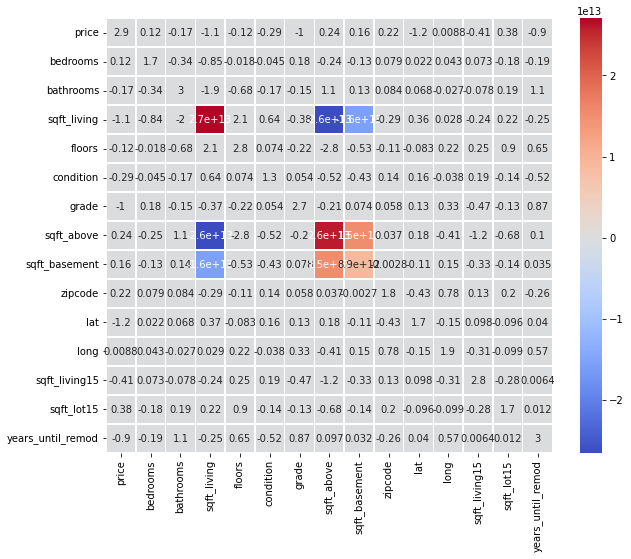

In [22]:
# we plot our new heatmap for better visibility of the values as follows
plt.figure(figsize=(10,8))

# We then plot our heatmap visualistion
sns.heatmap(inver2, annot=True, linewidth=0.5, cmap='coolwarm');

All scores seem to have dropped though its noted that sqft_lot15 has dropped significantly from a VIF value of 4.8 to 1.7 after removing sqft_lot. indicating that the two columns are .

sqft_lot also shows no correlation with price thus we will stick to our newly modified dataframe house_df2

## <font color='#2F4F4F'>4. Data Modeling</font>

In [23]:
# split into features (X) and label (Y). Price forms our target variable
X = house_df2.drop(columns=['price'])
y = house_df2['price']

In [24]:
house_df2.shape

(14931, 15)

In [25]:
house_df2['price'].mean()

438517.52119750855

In [26]:
# split into 80-20 train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
# fit regressor to data and make predictions
from sklearn.linear_model import LinearRegression

# initiate the model
lr = LinearRegression()

# fit the model
lr.fit(X_train, y_train)

# make prediction
y_pred = lr.predict(X_test)

In [28]:
# evaluate RMSE and r-squared scores
from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(" R-squared Score:", metrics.r2_score(y_test, y_pred))

Root Mean Squared Error: 109069.17298883741
 R-squared Score: 0.6373681738180523


In [ ]:
house_df2.head()

What conclusions have you drawn?

the model fits 64% of the dataset and therefore explain variation in the dependent variable to that extent

### 4.1 Test for normality and homoscedasticity

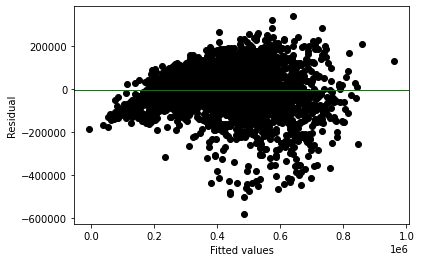

In [31]:
# create a dataframe of residuals
X1 = house_df2.drop(columns=['price']).values
y1 = house_df2['price'].values

X_train, X_test, price_train, price_test = train_test_split(X1, y1, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, price_train)

price_pred = regressor.predict(X_test)

# create a residual by subtracting test value from predited value for each column
residuals = np.subtract(price_pred, price_test)

pd.DataFrame(residuals).describe()

print("residual mean :", residuals.mean())

# plotting our residuals
plt.scatter(price_pred, residuals, color='black')
plt.ylabel('Residual')
plt.xlabel('Fitted values')
plt.axhline(y= residuals.mean(), color='green', linewidth=1)
plt.show()

What is your interpretation of the residual plot?

the residuals are centered not too far from the mean and also very close to 0

In [32]:
import scipy as sp

# using the scipy bartlett function to get our test result and p-value
test_result, p_value = sp.stats.bartlett(price_pred, residuals)

# computing the critical value of a chi-squared distribution
degree_of_freedom = len(price_pred) - 1
prob = 1 - p_value
critical_value = sp.stats.chi2.ppf(prob, degree_of_freedom)

print("Critical value:", critical_value)
print("p_value :", p_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data
print("test_result :", test_result)


Critical value: inf
p_value : 1.7788815360527893e-59
test_result : 264.5160957186014


If the test result of our Bartlett test is greater than the critical value of the chi-squared distribution, then we will reject our null value and conclude that the variances in our dataset are not equal, i.e., they are heterogeneous. Otherwise, we will accept that this dataset's variances are homogeneous.

In [33]:
if (test_result > critical_value):
    print(" The variances are heterogeneous (unequal), and the model needs to be reassessed.")
else:
    print('The variances are homogeneous (equal).')

The variances are homogeneous (equal).


In [37]:
# Used metric to assess model performance and implemented k-fold (k=10) cross-validation. 
from sklearn.model_selection import KFold
from sklearn import metrics

# We will use the same 4 independent variables for this
X1 = house_df2.drop(columns=['price']).values
y1 = house_df2['price'].values

folds = KFold(n_splits=10)

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X1)) + ' folds')

# We now create and assess 10 models based on the folds we created.
RMSES1 = [] # We will use this array to keep track of the RSME of each model
count = 1 # This will just help 
for train_index, test_index in folds.split(X1):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 10 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X1[train_index], X1[test_index]
  y_train, y_test = y1[train_index], y1[test_index]
  
  # fit a model accordingly
  regressor1 = LinearRegression()  
  regressor1.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred1 = regressor.predict(X_test)
  
  rmse_value1 =  np.sqrt(metrics.mean_squared_error(y_test, y_pred1))
  RMSES1.append(rmse_value1)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value1)
  count = count + 1

we are using 10 folds

Training model 1
Model 1 Root Mean Squared Error: 103568.75540415617

Training model 2
Model 2 Root Mean Squared Error: 111353.50144761598

Training model 3
Model 3 Root Mean Squared Error: 107501.1368275465

Training model 4
Model 4 Root Mean Squared Error: 106887.9023148014

Training model 5
Model 5 Root Mean Squared Error: 103579.26136690457

Training model 6
Model 6 Root Mean Squared Error: 105758.44253881136

Training model 7
Model 7 Root Mean Squared Error: 106667.74692442012

Training model 8
Model 8 Root Mean Squared Error: 102510.37558695713

Training model 9
Model 9 Root Mean Squared Error: 106883.23515876618

Training model 10
Model 10 Root Mean Squared Error: 105983.91323936


In [38]:
np.mean(RMSES1)

106069.42708093394

only model 2 had a higher RMSE than we had earler recorded. the average RMES1 was fairly lower at 106k compared with the earlier 109k though still higher than 10% of the Price mean value

### 4.2 Boosting

We can try boosting to see if it will improve our model. We will experiment with 3 types of boosting:
- Ada Boosting
- Gradient Boosting
- eXtreme Gradient (XG) Boosting

In [32]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# creating a list of learning rates to use as hyperparameters
learning_rates = [0.1, 0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# setting up our Ada booster
for lr in learning_rates:
    ada = AdaBoostRegressor(learning_rate = lr, random_state = 0)
    ada.fit(X_train, y_train)
    ada_predict = ada.predict(X_test)
    print("Ada Boosting Regression with Learning Rate:", lr)
    print("RMSE Score:", np.sqrt(metrics.mean_squared_error(y_test, ada_predict)))
    print()
    
print("***************************************************") 

# setting up our Gradient booster
for lr in learning_rates:
    gradient = GradientBoostingRegressor(learning_rate = lr, random_state = 0)
    gradient.fit(X_train, y_train)
    gradient_predict = gradient.predict(X_test)
    print("Gradient Boosting Regression with Learning Rate:", lr)
    print("RMSE Score:", np.sqrt(metrics.mean_squared_error(y_test, gradient_predict)))
    print()

print("***************************************************")

# setting up our XG booster
for lr in learning_rates:
    xgbr = XGBRegressor(learning_rate = lr, random_state = 0)
    xgbr.fit(X_train, y_train)
    xgbr_predict = xgbr.predict(X_test)
    print("XG Boosting Regression with Learning Rate:", lr)
    print("RMSE Score:", np.sqrt(metrics.mean_squared_error(y_test, xgbr_predict)))
    print()

Ada Boosting Regression with Learning Rate: 0.1
RMSE Score: 186077.34791649875

Ada Boosting Regression with Learning Rate: 0.2
RMSE Score: 189641.8705832352

Ada Boosting Regression with Learning Rate: 0.3
RMSE Score: 191071.43064772364

Ada Boosting Regression with Learning Rate: 0.4
RMSE Score: 193903.7601721961

Ada Boosting Regression with Learning Rate: 0.5
RMSE Score: 190487.9700394261

Ada Boosting Regression with Learning Rate: 0.6
RMSE Score: 190104.7061594122

Ada Boosting Regression with Learning Rate: 0.7
RMSE Score: 188434.5252152253

Ada Boosting Regression with Learning Rate: 0.8
RMSE Score: 192992.0981995456

Ada Boosting Regression with Learning Rate: 0.9
RMSE Score: 191158.99148741935

***************************************************
Gradient Boosting Regression with Learning Rate: 0.1
RMSE Score: 184057.22006495052

Gradient Boosting Regression with Learning Rate: 0.2
RMSE Score: 185143.19222393775

Gradient Boosting Regression with Learning Rate: 0.3
RMSE Score:

In [33]:
print("Ada Boosting R-squared Score:", metrics.r2_score(y_test, ada_predict))
print("Gradient Boosting R-squared Score:", metrics.r2_score(y_test, gradient_predict))
print("XG Boosting R-squared Score:", metrics.r2_score(y_test, xgbr_predict))

Ada Boosting R-squared Score: -0.08567191113824468
Gradient Boosting R-squared Score: -0.17120383511481063
XG Boosting R-squared Score: -0.13485332541703476


From the above analysis, we see that XG Boosting with a learning rate of 0.1 returned the lowest RMSE score (125,974). Although still higher than 10% of the target variable mean, it is a better score than that of the original linear regression. Also, the r-squared score of XG Boosting is 0.8 which means it fits about 80% of our data, which is much better than for linear regression.

## <font color='#2F4F4F'>5. Summary of Findings</font>

Our dataset met most of the assumptions for multiple linear regression such as normality and homoscedasticity. However, the assumptions on linearity, multicollinearity, and outliers were not fully met, thereby proving to be a poor data for multiple linear regression.

With XG Boosting, the model fit to about 80% of the data, thereby meeting our metric for success.

## <font color='#2F4F4F'>6. Recommendations</font>

I would recommend that Knightly Frankly use XG Boost Regressor rather than Multiple Linear Regression to predict the prices of the houses.

## <font color='#2F4F4F'>7. Challenging your Solution</font>

#### a) Did we have the right question?
Yes.

#### b) Did we have the right data?
Yes.

#### c) What can be done to improve the solution?
Apart from carrying out hyperparameter tuning, we can implement cross validation. Alternatively, we can try out other regression analysis models.